# Lab 5

## Problem 1

**a) Using the inverse matrix to calculate a past state**

In theory:

$\vec{v}_{n+1} = M \cdot \vec{v}_n$

$\vec{v}_{0} = M \cdot \vec{v}_{-1}$

Multiplying with the inverse of $M$ to solve for $\vec{v}_{-1}$

$ M^{-1} \cdot \vec{v}_{0} = M^{-1} \cdot M \cdot \vec{v}_{-1}$

We get:

$ M^{-1} \cdot \vec{v}_{0} = \vec{v}_{-1}$

Testing with python:

In [4]:
import numpy as np

v0 = np.array( [1.,8.,1.] )
M = np.array( [[0.95,0.1,0.02],[0.04,0.85,0.01],[0.01,0.05,0.97] ] )

vminus1 = np.dot(np.linalg.inv(M),v0)
print(f"state prior to initial state: {vminus1}")
print(np.sum(vminus1))
print(np.linalg.det(M)*np.linalg.norm(vminus1))

# normalized_state = vminus1 / np.sum(vminus1)
# print(normalized_state)
# print(np.sum(normalized_state))

state prior to initial state: [0.05136107 9.40292758 0.54571135]
10.000000000000002
7.3354314119893465


**What's the problem with this state?** 

**b) Adding dimension check for `v0` and `M` to the `Markov` constructor**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import det, norm, matrix_power
import pandas as pd

class Markov():
    def __init__(self, v0, M: np.array, colors = []):
        Mrows, Mcolumns = M.shape
        if Mrows == Mcolumns: # checks M is a square matrix
            if len(v0) == Mcolumns: # checks number of vector elements is equal to number of columns in M
                self.__i = 0 
                self.__v = [v0]
                self.__M = M
                self.colors = colors
            else:
                raise ValueError("Vector length does not equal Matrix number of columns.")
        else:
            raise ValueError("Matrix is not square.") 
               
    def __str__(self):
        return f"Timestep: {self.__i}\nState: {self.__v[-1]}"
    
    def evolve(self):
        self.__v.append( np.dot(self.__M, self.__v[-1]) )
        self.__i += 1

    def batch_evolve(self, time_steps):
        for n in range(time_steps):
            self.evolve()

    def calculate_state(self, time_steps): # just calculates the state but doesn't add it to self__v
        return np.dot(matrix_power(self.__M,time_steps), self.__v[0])

    def num_of_voters(self):
        return [np.sum(voters) for voters in self.__v]

    def abs(self):
        return [(det(self.__M)*norm(voters)) for voters in self.__v] # Talked about this in class but can't remember what it is for
    
    def plot(self):
        df = pd.DataFrame(self.__v, columns=self.colors)
        for column, color in zip(df.columns, self.colors):
            plt.plot(df.index, df[column], label=column, color=color)
        plt.xlabel("Timestep")
        plt.ylabel("Number of voters (in millions)")
        plt.legend()
        plt.show()

**c) Verifying that total number of voters remains constant**

In [6]:
# def numOfVoters(markov):
#     numOfVotersList = []
#     for timeStep in markov._Markov__v: # wrong, should be: `for timeStep in range(len(markov._Markov__v)):`
#         numOfVotersList.append(np.sum(markov._Markov__v[timeStep]))
#     return numOfVotersList
neurostan = Markov(v0, M, ["green","blue","red"])

# def numOfVoters(markov):
#     return [np.sum(voters) for voters in markov._Markov__v] # accessing private variables

for i in range(10):
    neurostan.evolve()
    # print(neurostan)
    
# print(numOfVoters(neurostan)) 
print(neurostan.num_of_voters()) # does the same as above but using a method from the class, therefore it doesn't access private variables.
print(neurostan.abs())



[10.0, 10.0, 10.0, 9.999999999999998, 10.0, 10.0, 9.999999999999998, 9.999999999999996, 9.999999999999998, 9.999999999999996, 9.999999999999996]
[6.327001109530487, 5.613835444374193, 5.137215734896528, 4.8404815180771745, 4.672292335224326, 4.590190577034541, 4.562129468834931, 4.565717795411968, 4.586241331833888, 4.614506690535556, 4.645038734152439]


**d) Calculating the next n steps via a single call**

As we know, given an initial state $\vec{v}_0$ and a transition matrix $M$, we can we can find the next state ($\vec{v}_1$) by calculating the dot product between $M$ and $\vec{v}_0$:

$\vec{v}_1 = M \cdot \vec{v}_0$

And to find the second state $\vec{v}_2$, we find the dot product between $M$ and $\vec{v}_1$:

$\vec{v}_2 = M \cdot \vec{v}_1$

We can replace $\vec{v}_1$ in this second equation, and get:

$\vec{v}_2 = M \cdot M \cdot \vec{v}_0$

$\vec{v}_2 = M^2 \cdot \vec{v}_0$

If we wanted to get $\vec{v}_3$:

$\vec{v}_3 = M \cdot \vec{v}_2$

$\vec{v}_3 = M \cdot M^2 \cdot \vec{v}_0$

$\vec{v}_3 = M^3 \cdot \vec{v}_0$

And so on and so forth, so for any state $\vec{v}_n$, the state can be calculated via

$\vec{v}_n = M^n \cdot \vec{v}_0$

###### Note: I did not implement a function to calculate a given state using the above formula, as that would mean skipping all the states in the middle, which would not be added to the internal list of states `self.__v`. So I implemented the method `batch_evolve` by using a simple loop and the already existing function `evolve`.

In [7]:
print(neurostan.calculate_state(8)) # Actually I did

neurostan.batch_evolve(90)
print(neurostan)

[4.27856322 2.91124846 2.81018832]
Timestep: 100
State: [4.55205653 1.47904873 3.96889474]


**Ploting the number of voters per step**


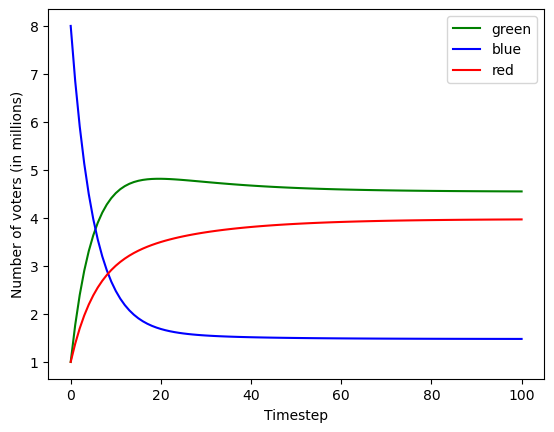

In [8]:
neurostan.plot()

The graph shows the evolution in time of the number of voters per party in the country of Neurostan. Altough in the initial state the vast majority of the voters identified with the centrist blue party, the nation quickly polarized, and by the 20th week, the nation was mostly divided between the left-wing green party, and the right-wing red party. It is interesting to note that after the 40th week approximately, the number of voters for each party remained more or less stable, after which it quickly reached a point of invariability, or the final state of the system.

**Why does the eigenvector vλ=1 associated with the eigenvalue λ = 1 represent the final state of the system v∞? Use np.linalg.eig(M) to calculate vλ=1**

An eigenvector of a matrix is a non-zero vector that, when the matrix is multiplied by it, results in a scaled version of the original vector (the vector might only be scaled by a scalar, not changed in direction).

The scalar by which the vector is scaled is called the eigenvalue.

In [13]:

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(M)
print(np.linalg.eig(M))

# Find the index of the eigenvalue 1 (or a value very close to 1)
index = np.argmin(np.abs(eigenvalues - 1))
print(index)

# Extract the corresponding eigenvector
stationary_distribution = np.real(eigenvectors[:, index])
print(stationary_distribution)
print(np.sum(stationary_distribution))

# Normalize the eigenvector to ensure it is a valid probability distribution
stationary_distribution /= np.sum(stationary_distribution) 
stationary_distribution *= 10

print(neurostan.calculate_state(50))

print("Stationary Distribution (v∞):", stationary_distribution)



EigResult(eigenvalues=array([0.81847933, 1.        , 0.95152067]), eigenvectors=array([[ 0.5680991 , -0.73102814, -0.6105343 ],
       [-0.79193493, -0.23758414, -0.16423887],
       [ 0.22383583, -0.63964962,  0.77477317]]))
1
[-0.73102814 -0.23758414 -0.63964962]
-1.6082619021867632
[4.62446056 1.49886027 3.87667917]
Stationary Distribution (v∞): [4.54545455 1.47727273 3.97727273]


## Problem 2


**Creation of a class `fraction`**

In [10]:
import copy

class frac():
    def __init__(self, p, q):
        if q != 0:
            self.__p = p
            self.__q = q
        else:
            raise ValueError("Invalid fraction, denominator cannot be 0.")

    def  __str__(self):
        return f"{self.__p}/{self.__q}"
    
    def __add__(self,b):
        if not isinstance(b, frac):
            raise TypeError("Unsuported operand type. Use a frac object.")
        
        return frac(self.__p * b.__q + self.__q * b.__p, self.__q * b.__q).short()
    
    def gre_com_div(self):
        p_copy = copy.copy(self.__p) 
        q_copy = copy.copy(self.__q)
        while q_copy:
            p_copy, q_copy = q_copy, p_copy % q_copy
        return abs(p_copy)

    def short(self):
        gcd = self.gre_com_div()
        return frac(self.__p / gcd, self.__q / gcd)

In [14]:
frac1 = frac(5, 9)
frac2 = frac(2, 7)

sum_frac = frac1 + frac2
print(sum_frac)

53.0/63.0
